In [16]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from pyxrf.model.command_tools import fit_pixel_data_and_save
from pyxrf.api import *

# Batch mode to fit data from multiple runs

Users need to have .json file ready in order to do batch mode fitting.

In [24]:
# Define working directory and json file
working_dir = '/data/users/2016Q3/Gill_2016Q3/' 

In [22]:
# Define a list of h5 files which should stay in the working directory.
datalist = np.arange(16715, 16808)
filelist = ['scan2D_'+str(n)+'.h5' for n in datalist]  

In [8]:
# Parameter file to fit all the data.
param_file = 'parameter_data.json'       

In [ ]:
# Pixel fitting for all the files. If ic_name is given, 
# data will be also normalized based on ion chamber value. 
for fname in filelist:
    fit_pixel_data_and_save(working_dir, fname, 
                            param_file_name=param_file, 
                            save_txt=True, ic_name='sclr1_ch4')

# Combine data into 3D array for reconstruction

In [32]:
element_list = ['Cu_K','Fe_K']
d3 = combine_data_to_recon(element_list, datalist, working_dir)

In [33]:
d3.keys()

['Fe_K', 'Cu_K']

<IPython.core.display.Javascript object>


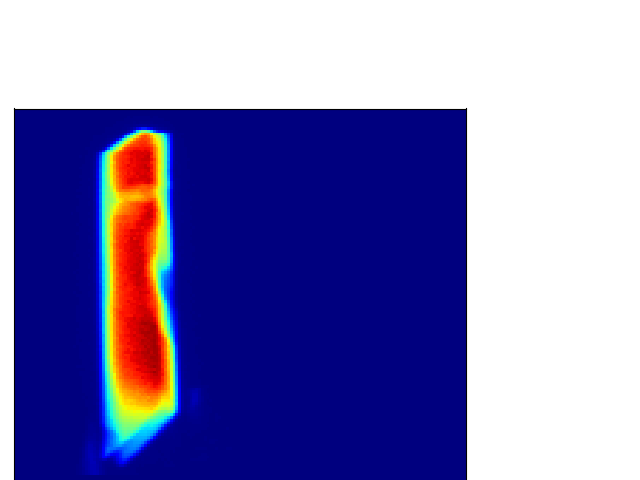

In [35]:
# create movie for Fe
create_movie(d3['Fe_K'], 'data3d_Fe.mp4')

<IPython.core.display.Javascript object>


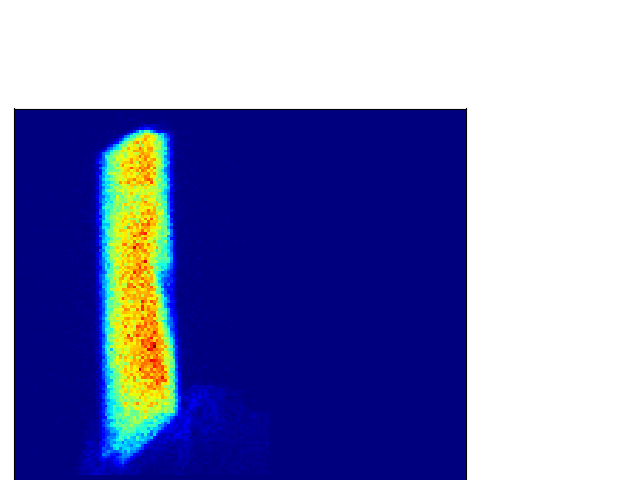

In [36]:
# create movie for Cu
create_movie(d3['Cu_K'], 'data3d_Cu.mp4')